###Crash course worked examples:

NUID: 002709300

The main goal of this notebook, is to understand the concept of causal inference and causal discovery with causalNex library.

Example 1: In this notebook, I have taken an example to understand the concept of "causal inference and causal discovery" in causality.

Causal inference is a process used to determine the cause and effect relationship between variables. It goes beyond mere correlation or association by trying to establish whether changing one variable (the cause or treatment) directly influences another variable (the effect or outcome).

I have taken the "Economics of Happiness" dataset to perform analysis to understand causal inference and to find the causal discovery. This dataset is a large database of various features that effect or cause an impact on happiness index of people.

In [1]:
!pip install dowhy
!pip install causalinference
!pip install causalnex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# load data
import pandas as pd

df = pd.read_csv("/content/TEH_World_Happiness_2015_2018_Imputed.csv")
df.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          626 non-null    object 
 1   Happiness rank   626 non-null    int64  
 2   Happiness Score  626 non-null    float64
 3   GDP per capita   622 non-null    float64
 4   Social support   622 non-null    float64
 5   Healthy life     622 non-null    float64
 6   Freedom          622 non-null    float64
 7   Generosity       622 non-null    float64
 8   Corruption       620 non-null    float64
 9   Year             626 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 49.0+ KB


In [5]:
#describing the dataset
df.describe()

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
count,626.000000,626.000000,622.000000,622.000000,622.000000,622.000000,622.000000,620.000000,626.000000
mean,78.747604,5.372021,0.924672,1.052617,0.588056,0.418379,0.228441,0.130179,2016.493610
std,45.219609,1.131774,0.404416,0.319079,0.238123,0.151795,0.125943,0.108011,1.120339
min,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001990,0.001000,2015.000000
25%,40.000000,4.497750,0.622672,0.852818,0.415013,0.312000,0.138527,0.057471,2015.000000
50%,79.000000,5.307000,0.985745,1.082250,0.635165,0.435493,0.209145,0.094860,2016.000000
75%,118.000000,6.187250,1.243355,1.284491,0.774117,0.539578,0.291473,0.161930,2017.000000
max,158.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.838075,0.551910,2018.000000


In [6]:
# to check the missing calues in dataset

df.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     4
Social support     4
Healthy life       4
Freedom            4
Generosity         4
Corruption         6
Year               0
dtype: int64

In [7]:
#to present the unique values in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")

# Checking for unique number of countries present in the dataset
unique_countries_count = df['Country'].nunique()
print(f"Number of unique countries: {unique_countries_count}")

Unique values in Country: ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'P

In [8]:
#Let's drop the 'Country' and 'Happiness rank' columns from out dataset,
#Since we don't be needing the country column and
#we already have 'Happiness Score' which we will be considering as output variable
df = df.drop(['Country'], axis=1)
df = df.drop(['Happiness rank'], axis=1)

print(df.head())

   Happiness Score  GDP per capita  Social support  Healthy life  Freedom  \
0            7.587         1.39651         1.34951       0.94143  0.66557   
1            7.561         1.30232         1.40223       0.94784  0.62877   
2            7.527         1.32548         1.36058       0.87464  0.64938   
3            7.522         1.45900         1.33095       0.88521  0.66973   
4            7.427         1.32629         1.32261       0.90563  0.63297   

   Generosity  Corruption  Year  
0     0.29678     0.41978  2015  
1     0.43630     0.14145  2015  
2     0.34139     0.48357  2015  
3     0.34699     0.36503  2015  
4     0.45811     0.32957  2015  


                 Happiness Score  GDP per capita  Social support  \
Happiness Score         1.000000        0.793169        0.622214   
GDP per capita          0.793169        1.000000        0.547970   
Social support          0.622214        0.547970        1.000000   
Healthy life            0.757339        0.794943        0.500039   
Freedom                 0.545924        0.343814        0.454299   
Generosity              0.152348        0.006776       -0.004733   
Corruption              0.405835        0.322495        0.130130   
Year                   -0.002727        0.046911        0.374198   

                 Healthy life   Freedom  Generosity  Corruption      Year  
Happiness Score      0.757339  0.545924    0.152348    0.405835 -0.002727  
GDP per capita       0.794943  0.343814    0.006776    0.322495  0.046911  
Social support       0.500039  0.454299   -0.004733    0.130130  0.374198  
Healthy life         1.000000  0.350848    0.069981    0.274956 -0.050005  
Freedom

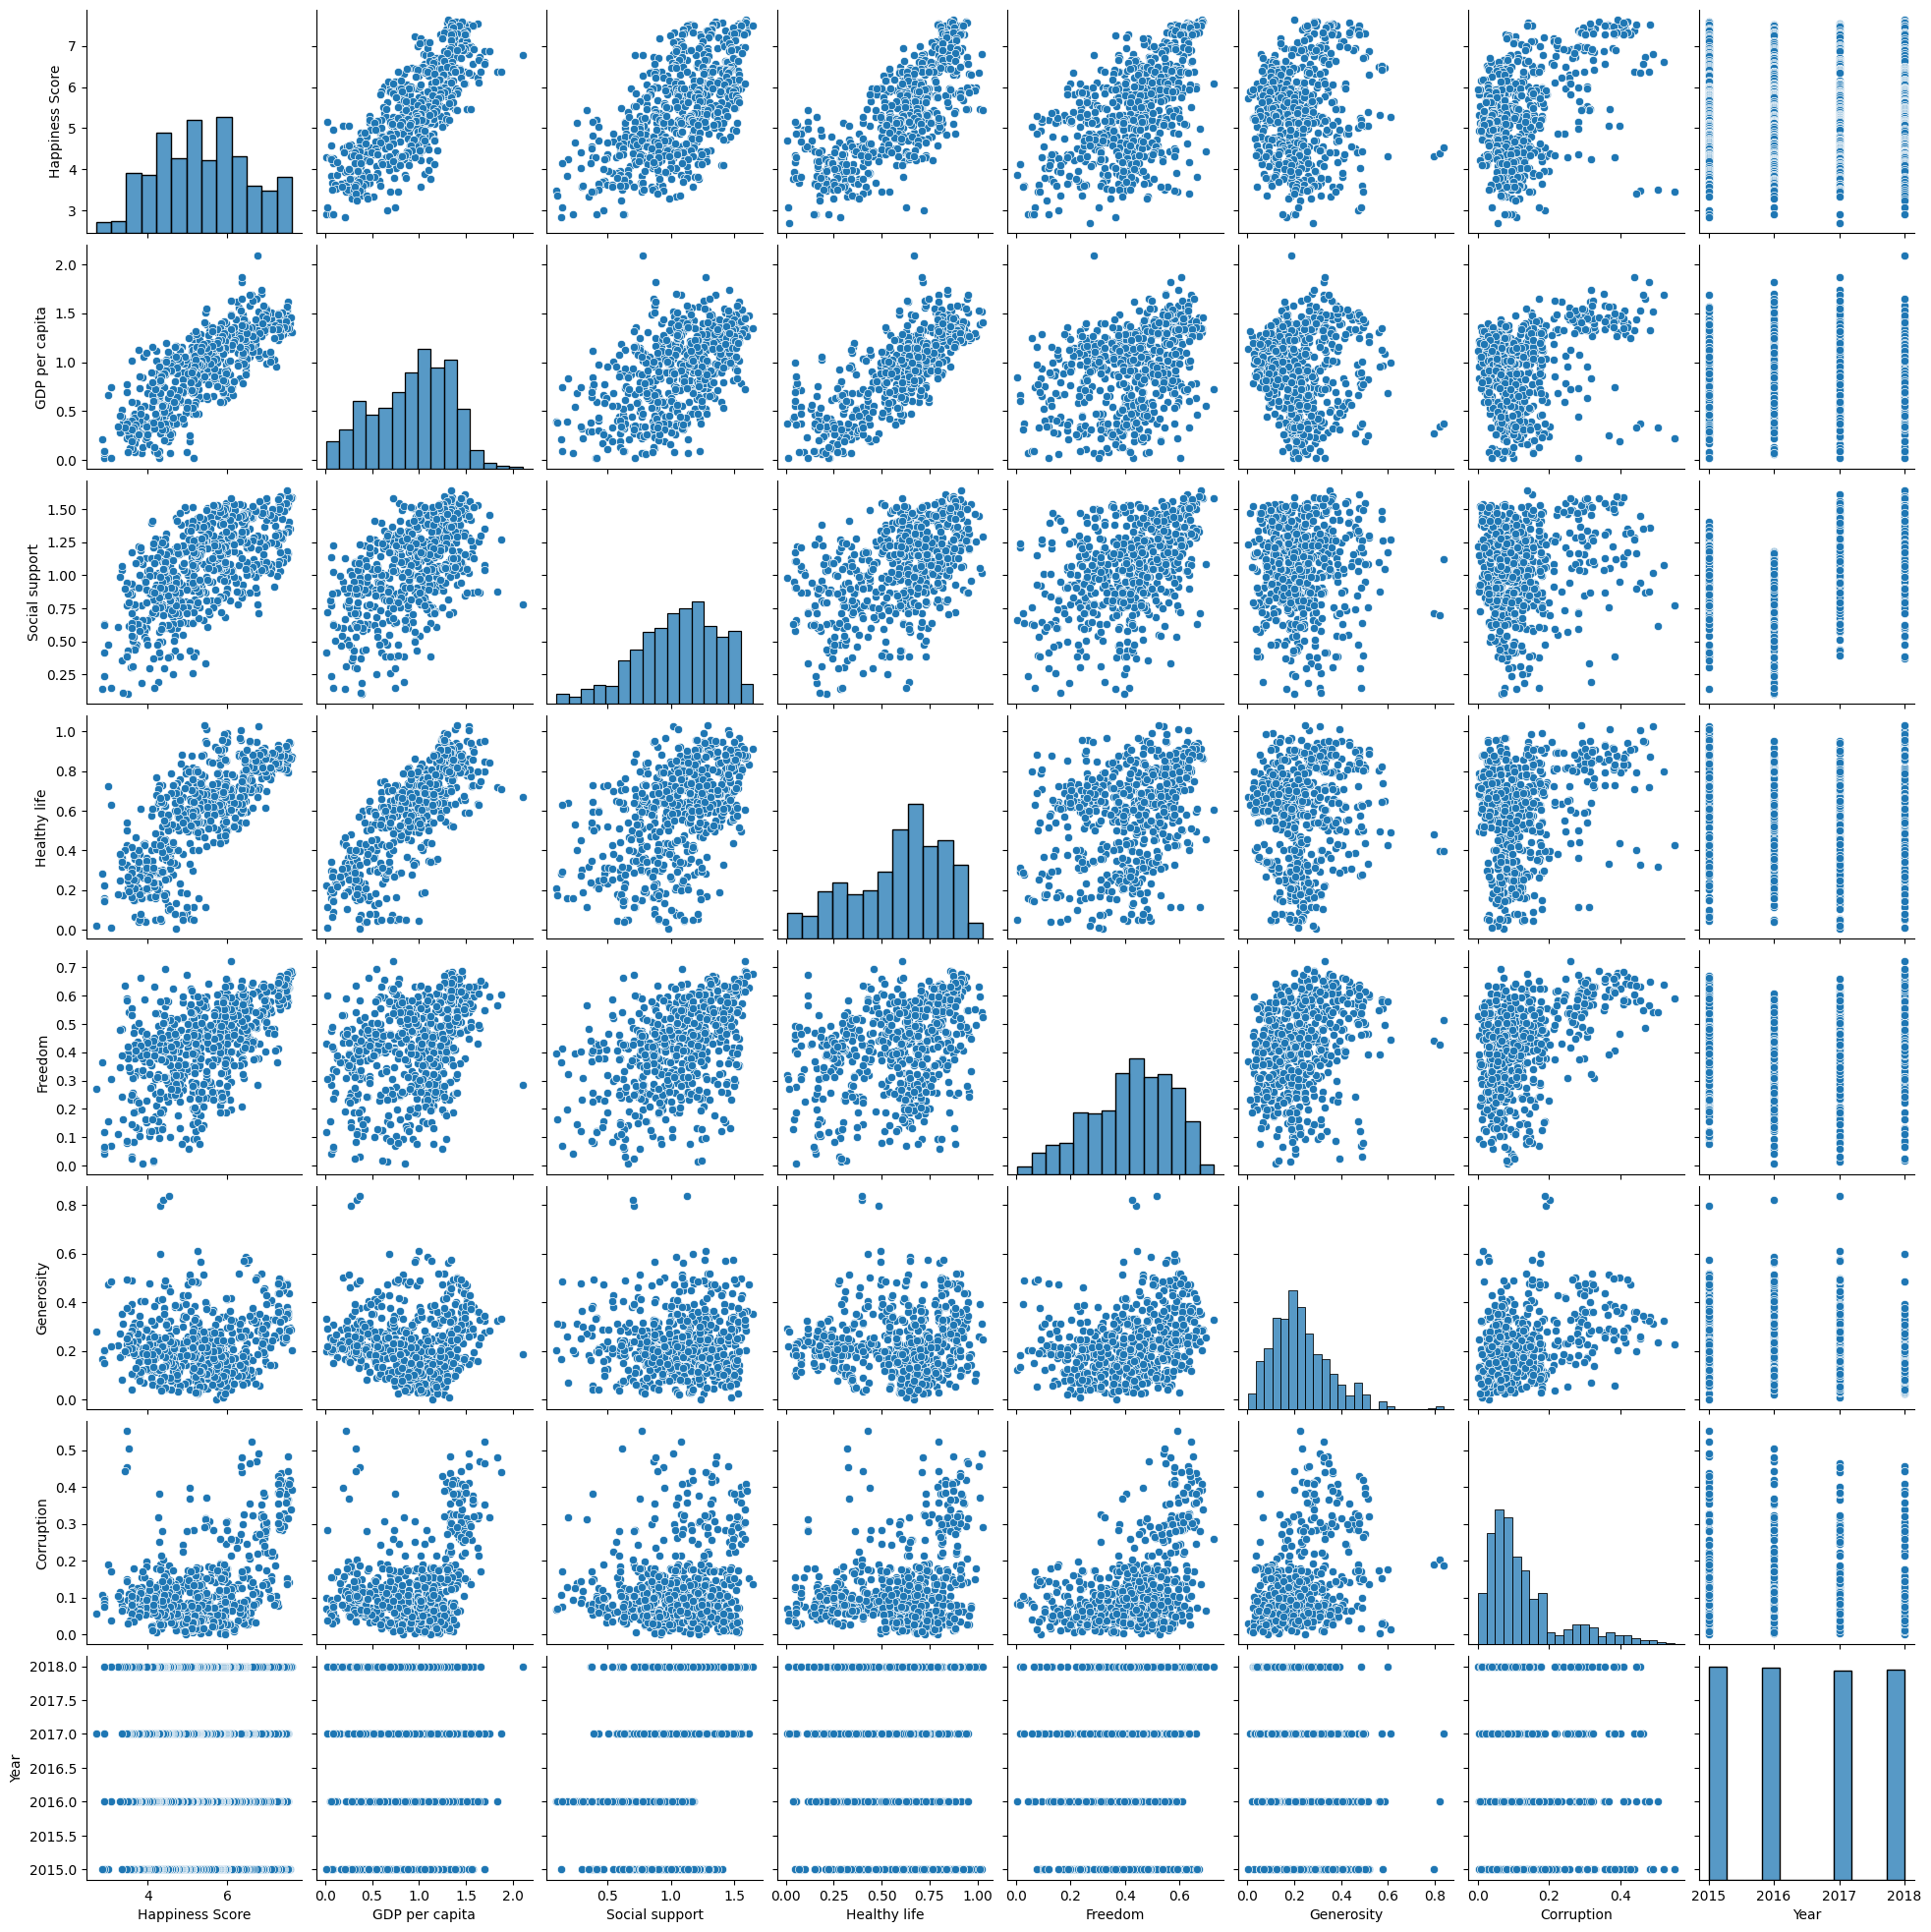

In [12]:
#Pearson correlation coefficients, to measure the strength and direction of linear relationships between pairs of continuous variables.
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

#Visualizing relationships using pair plots or heatmaps
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(df)
plt.show()

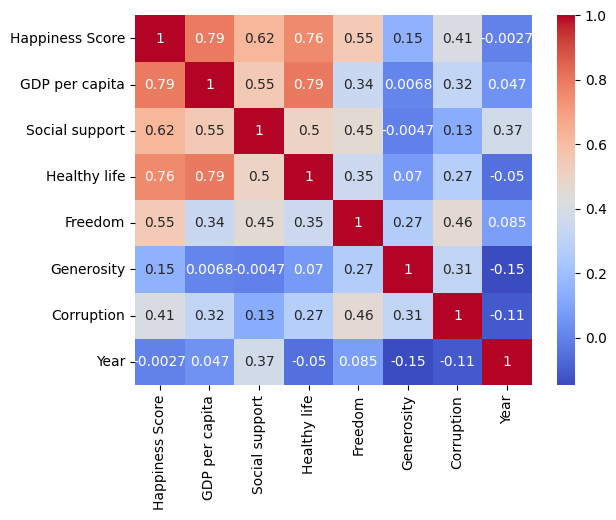

In [13]:
#Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

The correlation coefficients in the matrix represent the strength and direction of linear relationships between pairs of variables. Here's an interpretation of the correlation coefficients:

* Happiness Score vs. Other Variables: GDP per capita (0.793925): There is a strong positive correlation between GDP per capita and Happiness Score. As the GDP per capita increases, the Happiness Score tends to increase as well.

* Social Support (0.637676): There is a positive correlation between Social Support and Happiness Score, indicating that countries with higher social support tend to have higher happiness scores.

* Healthy Life (0.744793): There is a strong positive correlation between Healthy Life and Happiness Score, suggesting that countries with better health conditions tend to have higher happiness scores.

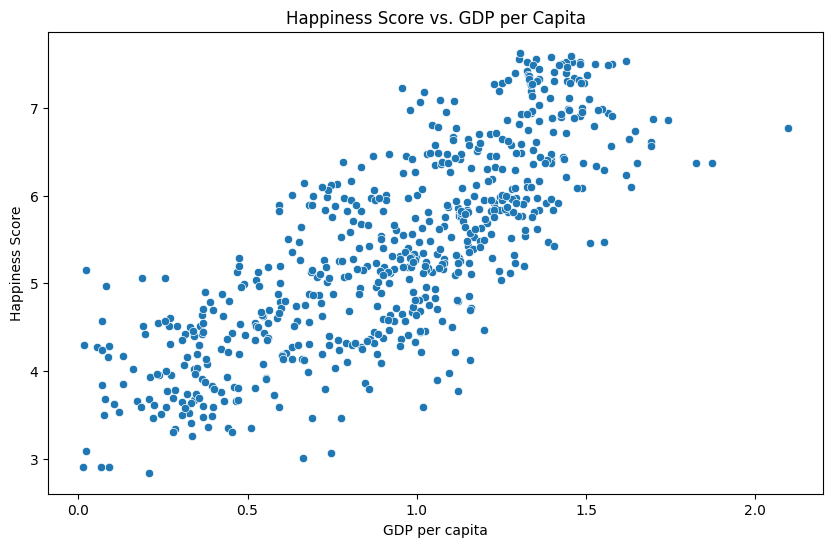

In [14]:
#Lets see a scatter plot between Happiness Score and GDP per Capita,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df)
plt.title('Happiness Score vs. GDP per Capita')
plt.show()

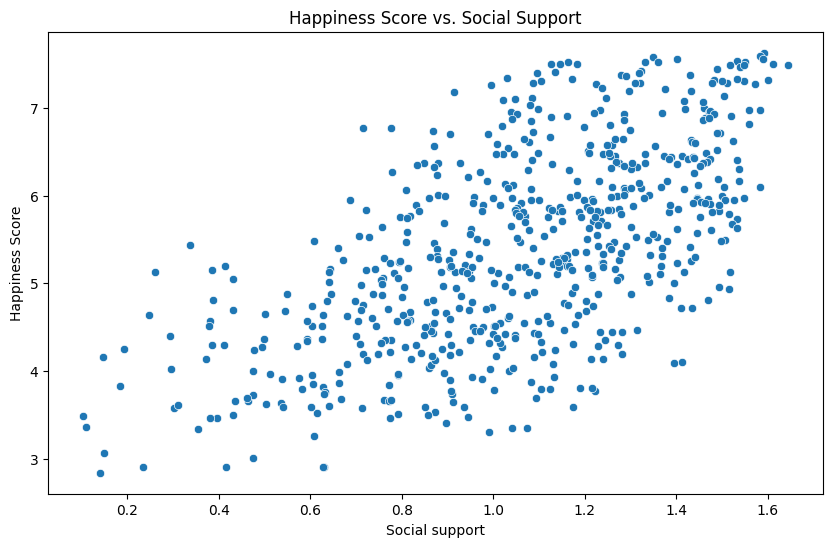

In [15]:
#Lets see a scatter plot between Happiness Score and Social Support,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Social Support')
plt.show()

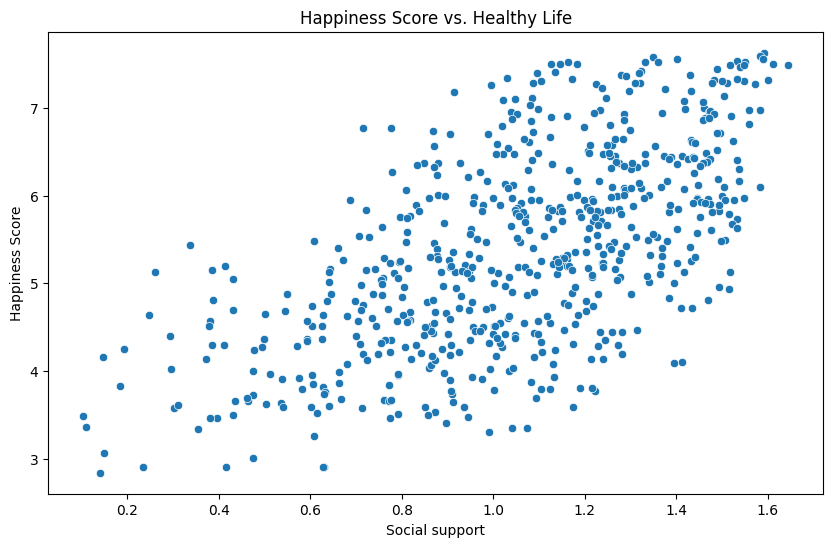

In [16]:
#Lets see a scatter plot between Happiness Score and Social Support,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Healthy Life')
plt.show()

In [17]:

import statsmodels.api as sm

#Dropping the missing value rows
df_cleaned = df.dropna()

X = df_cleaned[['GDP per capita', 'Social support', 'Healthy life', 'Freedom']]
X = sm.add_constant(X)
y = df_cleaned['Happiness Score']


In [18]:
#Linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     462.8
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          3.57e-181
Time:                        21:31:51   Log-Likelihood:                -501.07
No. Observations:                 601   AIC:                             1012.
Df Residuals:                     596   BIC:                             1034.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2419      0.087     25.

The Ordinary Least Squares (OLS) regression results indicate that the model is statistically significant in explaining the variation in the Happiness Score.

* From the above OLS analysis; The R-squared value of 0.756 suggests that approximately 75.6% of the variability in Happiness Score can be explained by the included independent variables (GDP per capita, Social support, Healthy life, and Freedom).

* The adjusted R-squared, accounting for the number of predictors, remains high at 0.755. The individual coefficients reveal the estimated impact of each independent variable on Happiness Score, with all variables—GDP per capita, Social support, Healthy life, and Freedom—demonstrating statistically significant effects. For instance, a one-unit increase in GDP per capita is associated with a 1.1616-unit rise in Happiness Score, while similar interpretations apply to the other variables.

* The overall F-statistic is highly significant (p-value < 0.001), indicating that the model is collectively significant. However, considerations should be made for the normality of residuals, as suggested by the Omnibus and Jarque-Bera tests, and potential multicollinearity concerns indicated by the condition number.

The Durbin-Watson statistic suggests no apparent autocorrelation in the residuals. In summary, the model effectively captures a substantial portion of the variability in Happiness Score, providing valuable insights into the influence of the included factors.

###Let see the effect of time on Happiness Score, is it increasing with time or is it decreasing?

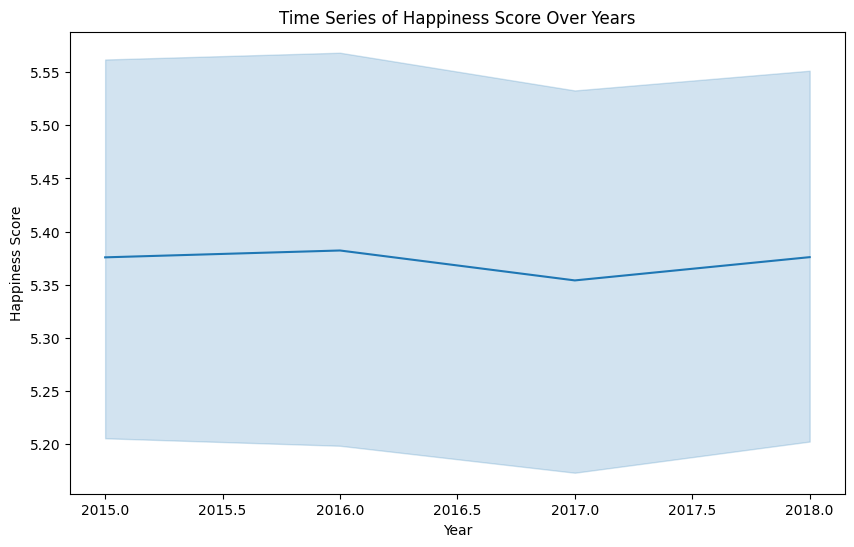

In [19]:
df_sorted = df.sort_values(by='Year')


# Time series plot for Happiness Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=df_sorted)
plt.title('Time Series of Happiness Score Over Years')
plt.show()

From above we can suggest that their in no constant increase or decrease in happiness score wrt time. Their are ups and downs. So we can state that happiness score doesn't depend on time.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_cleaned2 = df_cleaned
data = df_cleaned2
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Fit a linear regression model
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
model.fit(train_data[features], train_data['Happiness Score'])
test_predictions = model.predict(test_data[features])
# Model performance evaluation
mse = mean_squared_error(test_data['Happiness Score'], test_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.29565916166097767


In [21]:
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
print(train_data[features].head())

     GDP per capita  Social support  Healthy life   Freedom
9          1.333580         1.30923      0.931560  0.651240
387        1.069318         1.25819      0.650785  0.208716
542        1.039000         1.49800      0.700000  0.307000
194        1.342530         1.12945      0.878960  0.375450
136        0.757780         0.86040      0.166830  0.103840


In [22]:
print(train_data[features].shape)

(480, 4)


Now to perform causal inference analysis for each individual feature to estimate its impact on the 'Happiness Score' while controlling for the effects of other features. The DoWhy library is used to handle the causal modeling, identification, and estimation steps, providing a systematic approach to causal inference.

In [23]:
!pip install dowhy
from dowhy import CausalModel


In [24]:



data = df_cleaned2.copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the outcome variable ('Happiness Score')
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']

model.fit(train_data[features], train_data['Happiness Score'])

# Predict the outcome variable on the test set
test_data['Predicted Happiness Score'] = model.predict(test_data[features])

# Assess the performance of the linear regression model
mse = mean_squared_error(test_data['Happiness Score'], test_data['Predicted Happiness Score'])
print(f'Mean Squared Error (MSE) of the model: {mse}')

# Perform causal inference using DoWhy for each feature
for feature in features:
    print(f"\nCausal Inference for {feature} as the treatment variable:")

    # Create a causal model for the specific feature
    causal_model = CausalModel(
        data=train_data,
        treatment=feature,
        outcome='Happiness Score',
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect: {causal_estimate.value}')

Mean Squared Error (MSE) of the model: 0.29565916166097767

Causal Inference for GDP per capita as the treatment variable:
Estimated Average Treatment Effect: 1.1139278024462538

Causal Inference for Social support as the treatment variable:
Estimated Average Treatment Effect: 0.5777472600272642

Causal Inference for Healthy life as the treatment variable:


Estimated Average Treatment Effect: 1.22312111715158

Causal Inference for Freedom as the treatment variable:
Estimated Average Treatment Effect: 1.848125183996788


Let's break down the key findings:

In summary, these estimated treatment effects provide insights into the average impact of changes in each respective feature on the 'Happiness Score' based on the causal inference model. The larger the estimated effect, the stronger the perceived influence of that feature on happiness. Keep in mind that these are average effects, and individual responses may vary

###Matching or Propensity Score Matching:

For estimating the causal effects of features on the outcome variable ('Happiness Score') using propensity score matching and the DoWhy library.

* Propensity scores are used to create matched pairs of treated and control units, and causal inference is then performed on the matched dataset to estimate the average treatment effect for each feature

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use LinearRegression for continuous outcome
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from dowhy import CausalModel

# Assume you have a cleaned dataset named 'df_cleaned2'
data = df_cleaned2.copy()

# Specify the columns in your dataset
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
treatment_variable = 'Happiness Score'
outcome_variable = 'Happiness Score'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the treatment variable
linear_model = LinearRegression()
linear_model.fit(train_data[features], train_data[treatment_variable])

# Predict propensity scores on the training set
train_data['Propensity Score'] = linear_model.predict(train_data[features])

# Apply propensity score matching
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[features])
scaled_treatment = np.array(train_data['Propensity Score']).reshape(-1, 1)

# Use nearest neighbors to find matches with a larger number of neighbors (e.g., 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(np.hstack([scaled_features, scaled_treatment]))

# Find nearest neighbors in the test set
test_data['Propensity Score'] = linear_model.predict(test_data[features])
scaled_test_features = scaler.transform(test_data[features])
scaled_test_treatment = np.array(test_data['Propensity Score']).reshape(-1, 1)

distances, indices = neighbors.kneighbors(np.hstack([scaled_test_features, scaled_test_treatment]))

# Create matched dataset
matched_data = train_data.iloc[indices.flatten()]

# Perform causal inference using DoWhy for each feature
for feature in features:
    # Perform causal inference using the matched data
    causal_model_matched = CausalModel(
        data=matched_data,
        treatment=feature,
        outcome=outcome_variable,
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model_matched.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model_matched.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect with Propensity Score Matching for {feature}: {causal_estimate.value}')

Estimated Average Treatment Effect with Propensity Score Matching for GDP per capita: 1.2825187911725306
Estimated Average Treatment Effect with Propensity Score Matching for Social support: 0.6304747534214616
Estimated Average Treatment Effect with Propensity Score Matching for Healthy life: 1.2258911374750676
Estimated Average Treatment Effect with Propensity Score Matching for Freedom: 1.8034819139440499


Above values provide an estimate of the average change in the outcome variable (Happiness Score) when the specified feature is increased by one unit, considering the matched control and treatment groups based on propensity scores. These estimates are derived from the propensity score matching method and are used to infer causal relationships from observational data.

* Consistent Positive Effects: In both methods, Social support, Healthy life, and Freedom consistently show substantial positive effects on Happiness Score.

* GDP per Capita Influence:GDP per capita has a positive effect, but the magnitude is smaller compared to the other features.

* Methodological Consistency: While there are differences in the estimated magnitudes between the two methods, the general trend is similar.

####**Key Takeaways:**

These results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score, according to the specific context and assumptions made in the analysis.

GDP per capita contributes positively to happiness but with a comparatively smaller impact.

The estimated effects are averages, and individual variations may exist.

####**Conclusion:**

The causal analyses consistently highlighted the positive impact of GDP per capita, Social support, Healthy life, and Freedom on happiness.

While each method provided valuable insights, it's crucial to acknowledge the assumptions and limitations inherent in causal inference.

In summary, these results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score, according to the specific context and assumptions made in the analysis.

####**Example2:**


For the 2nd example, About this dataset excel Workbook containing two worksheets - one with Hubei located patients; one with patients outsie Hubei.



In [46]:
import numpy as np # linear algebra
!pip install causalnex > null

In [47]:
!pip install pandas==0.25.0 > null
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [48]:
data = pd.read_excel('/content/COVID19_2020_open_line_list.xlsx')

In [49]:
data = data[['age', 'sex', 'city', 'latitude', 'longitude', 'symptoms', 'reported_market_exposure', 'chronic_disease_binary', 'outcome' ]]
data.describe()

,latitude,longitude,chronic_disease_binary
count,14617.000000,14617.000000,28.000000
mean,32.404958,104.503379,0.821429
std,7.702172,34.620661,0.390021
min,-42.000000,-124.953070,0.000000
25%,27.905380,108.787200,1.000000
50%,32.583825,114.851500,1.000000
75%,35.781340,120.143600,1.000000
max,69.817800,174.740000,1.000000


In [50]:
data["outcome"].fillna("alive", inplace = True)
data["reported_market_exposure"].fillna("no", inplace = True)
data["chronic_disease_binary"].fillna("no", inplace = True)
data["symptoms"].fillna("none", inplace = True)
data = data.dropna(axis = 0, how ='any')
data.head(10)

,age,sex,city,latitude,longitude,symptoms,reported_market_exposure,chronic_disease_binary,outcome
0,30,male,"Chaohu City, Hefei City",31.646960,117.716600,none,no,no,alive
1,47,male,"Baohe District, Hefei City",31.778630,117.331900,none,no,no,alive
2,49,male,"High-Tech Zone, Hefei City",31.828313,117.224844,none,no,no,alive
3,47,female,"High-Tech Zone, Hefei City",31.828313,117.224844,none,no,no,alive
4,50,female,"Feidong County, Hefei City",32.001230,117.568100,none,no,no,alive
6,42,female,Fuyang City,32.918800,115.703600,fever,no,no,alive
8,59,female,Huainan City,32.757380,116.734000,fever,no,no,alive
9,30,male,Hefei City,31.794440,117.342800,none,no,no,alive
11,39,male,Fuyang City,32.918800,115.703600,none,no,no,alive
13,38,female,Chizhou City,30.285250,117.365800,cough,no,no,alive


In [51]:
struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['age', 'sex', 'city', 'symptoms', 'reported_market_exposure', 'chronic_disease_binary', 'outcome']


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col].astype(str))

In [53]:
struct_data.describe()

,age,sex,city,latitude,longitude,symptoms,reported_market_exposure,chronic_disease_binary,outcome
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,48.514706,2.551471,205.224265,30.309906,97.577520,132.576287,3.988051,1.977022,2.441176
std,20.441623,0.522817,125.194433,14.715374,51.788373,43.398494,0.207594,0.177961,1.559089
min,0.000000,0.000000,0.000000,-37.813600,-124.953070,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,97.000000,25.392360,103.847200,90.000000,4.000000,2.000000,2.000000
50%,48.000000,3.000000,202.500000,34.045897,108.787200,159.000000,4.000000,2.000000,2.000000
75%,62.000000,3.000000,314.000000,39.608280,117.338400,159.000000,4.000000,2.000000,2.000000
max,103.000000,4.000000,427.000000,68.650000,174.740000,175.000000,5.000000,2.000000,11.000000


In [54]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)

In [55]:
from causalnex.plots import plot_structure
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()

In [57]:
network_viz = plot_structure(sm)


In [58]:
data = pd.read_excel('/content/COVID19_2020_open_line_list.xlsx')

In [59]:
data = data[['age', 'sex', 'city', 'latitude', 'longitude', 'symptoms', 'reported_market_exposure', 'chronic_disease_binary', 'outcome' ]]
data.describe()
data["outcome"].fillna("alive", inplace = True)
data["reported_market_exposure"].fillna("no", inplace = True)
data["chronic_disease_binary"].fillna("no", inplace = True)
data["symptoms"].fillna("none", inplace = True)
data = data.dropna(axis = 0, how ='any')

<ipython-input-59-f5e01780047a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["outcome"].fillna("alive", inplace = True)
<ipython-input-59-f5e01780047a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reported_market_exposure"].fillna("no", inplace = True)
<ipython-input-59-f5e01780047a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["chronic_disease_binary"].fillna("no", inplace = True)
<ipython-input-59-f5e01780

In [60]:
struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col].astype(str))

struct_data.head(10)

,age,sex,city,latitude,longitude,symptoms,reported_market_exposure,chronic_disease_binary,outcome
0,30,3,53,31.646960,117.716600,159,4,2,2
1,50,3,20,31.778630,117.331900,159,4,2,2
2,52,3,135,31.828313,117.224844,159,4,2,2
3,50,2,135,31.828313,117.224844,159,4,2,2
4,54,2,86,32.001230,117.568100,159,4,2,2
6,45,2,96,32.918800,115.703600,90,4,2,2
8,64,2,148,32.757380,116.734000,90,4,2,2
9,30,3,129,31.794440,117.342800,159,4,2,2
11,40,3,96,32.918800,115.703600,159,4,2,2
13,39,2,62,30.285250,117.365800,36,4,2,2


In [61]:
struct_data.describe()

,age,sex,city,latitude,longitude,symptoms,reported_market_exposure,chronic_disease_binary,outcome
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,48.514706,2.551471,205.224265,30.309906,97.577520,132.576287,3.988051,1.977022,2.441176
std,20.441623,0.522817,125.194433,14.715374,51.788373,43.398494,0.207594,0.177961,1.559089
min,0.000000,0.000000,0.000000,-37.813600,-124.953070,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,97.000000,25.392360,103.847200,90.000000,4.000000,2.000000,2.000000
50%,48.000000,3.000000,202.500000,34.045897,108.787200,159.000000,4.000000,2.000000,2.000000
75%,62.000000,3.000000,314.000000,39.608280,117.338400,159.000000,4.000000,2.000000,2.000000
max,103.000000,4.000000,427.000000,68.650000,174.740000,175.000000,5.000000,2.000000,11.000000


In [62]:
struct_data['outcome'].value_counts()

2     981
5      34
10     30
6      23
3       7
4       5
1       2
8       2
0       1
9       1
7       1
11      1
Name: outcome, dtype: int64

In [64]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)

from causalnex.plots import plot_structure
sm.remove_edges_below_threshold(0.8)
sm = sm.get_largest_subgraph()
network_viz = plot_structure(sm)

####What is CausalNex?

CausalNex allows data scientists and domain experts to co-develop models that go beyond correlation and consider causal relationships.

###**License:**

Copyright (c) 2024 Anushree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

###**References:**

https://research.google/pubs/inferring-causal-impact-using-bayesian-structural-time-series-models/

https://causalnex.readthedocs.io/en/0.4.2/01_introduction/01_introduction.html

https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Structure-Learning

https://medium.com/causality-in-data-science/what-is-causal-machine-learning-ceb480fd2902

https://arxiv.org/abs/1911.10500